In [2]:
# import matplotlib
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from io import StringIO #used to convert string to a dataframe

# Modify a Model

## Read

Read Module 2.3 of *Introduction to Computational Science* by Shiflet and Shiflet.

## Review

The fundamental idea behind dynamic models is:

$$\mathrm{future\ value} = \mathrm{value\ now} + \mathrm{predicted\ change}$$

The model oftens describes the rate of change in a value. In this case, the *predicted change* in a value is its *rate of change* times a time interval.

$$\mathrm{predicted\ change} = \mathrm{(rate\ of\ change)*(time\ interval)}$$

Putting this together, we have

$$\mathrm{future\ value} = \mathrm{value\ now} + \mathrm{(rate\ of\ change)*(time\ interval)}$$

## The Model

The "model" for a system is an equation that describes the *rate of change* of a system.

## Unconstrained Population Growth

The model for unconstrained population growth is

$$\mathrm{rate\ of\ change} = \frac{\Delta P}{\Delta t}=rP$$

where $r$ is a constant that describes the rate of growth of the system and $P$ is the population.



## Example

This is the example on page 22 of Module 2.2 in *Introduction to Computational Science*. Suppose that we start a clock when we have 100 cells of bacteria. This is called an *initial condition*, and we define this to be the starting time $t=0$.

t (h) | P (cells)
--- | ---
0 | 100

Suppose the bacteria grows with a growth rate $r=0.1\ \mathrm{h}^{-1}$. In the program below

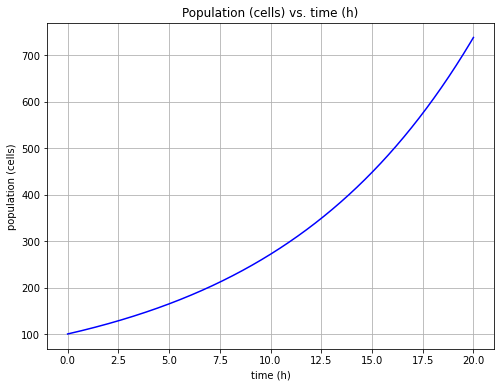

In [5]:

## define constants
r = 0.1
dt = 0.005

# define variables and their initial values
P = 100
t = 0

# create empty lists for storing data
xmodel = []
ymodel = []

# append initial values of t and P to our lists
xmodel.append(t)
ymodel.append(P)

# loop
while t<20:
    rate = r*P
    P = P + rate*dt
    t = t + dt
    
    xmodel.append(t)
    ymodel.append(P)

plt.figure(figsize=(8,6))
plt.title('Population (cells) vs. time (h)')
plt.xlabel('time (h)')
plt.ylabel('population (cells)')
plt.plot(xmodel,ymodel,'b-')
plt.grid()
plt.show()

## Constrained Population Growth

Populations do not grow unconstrained forever. The population can reach the limit of what the environment can support. Perhaps part of the population starts dying, or perhaps the population competes for resources. As we saw in the video by Grant Sanderson, exponential growth is always the initial phase of growth for any population because in the "real world" the population eventually reaches a maximum sustainable level.

Here is real data on bacterial growth from Dr. Segarra at High Point University.



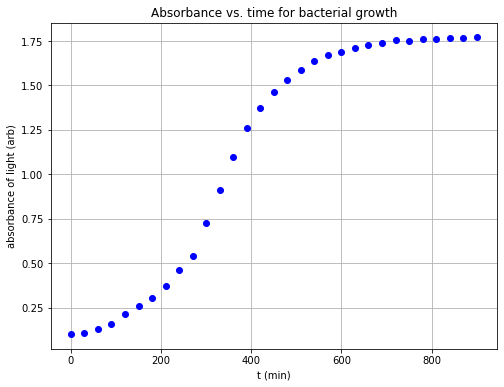

In [3]:
# define data
# t (min)	absorbance (arb)
data = StringIO("""x	y
0	0.101
30	0.109
60	0.13
90	0.157
120	0.211
150	0.26
180	0.303
210	0.373
240	0.46
270	0.541
300	0.723
330	0.913
360	1.099
390	1.263
420	1.371
450	1.463
480	1.531
510	1.587
540	1.635
570	1.673
600	1.691
630	1.713
660	1.729
690	1.74
720	1.753
750	1.751
780	1.761
810	1.764
840	1.769
870	1.768
900	1.77
""") 

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")

# define arrays for the data
xdata = df['x']
ydata = df['y']

# plot data and the best-fit function on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("Absorbance vs. time for bacterial growth")
plt.xlabel('t (min)')
plt.ylabel('absorbance of light (arb)')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'bo')
plt.show()

## Adding a "Death Rate" to our model

The maximum population at which it levels out is called the *carrying capacity*, $M$. For the data above $M=1.75$.

Why does the population reach a maximmum and stay level? 

When the population is constant (at carrying capacity), the rate of births is equal to the rate of deaths. In other words, for every member added to the population, a member leaves the population. Therefore, we have a death rate that depends on both the population and the carrying capacity. And when $P=M$, the total rate of change should be zero.

Our model is:

$$\mathrm{rate\ of\ change} = \mbox{rate of change due to births} + \mbox{rate of change due to deaths}$$


$$\mathrm{rate\ of\ change} = rP + -r \left(\frac{P}{M}\right)P$$

Note that if $P$ is small, the birth rate dominates. If $P$ is large, the death rate dominates. And when $P=M$, the death rate is equal to the birth rate, so the total rate of change is zero and the population is constant. This model has all the features we want.

## Modifying the model

Add the death rate to the model of bacterial growth below. Define and use the following parameters:

- a carrying capacity of $M=2000$
- a growth rate parameter of $r=0.1$.

If you don't see any change in the 20 h of time that your model is being calculated, run your model for a longer time (perhaps to 100 hours, for example).


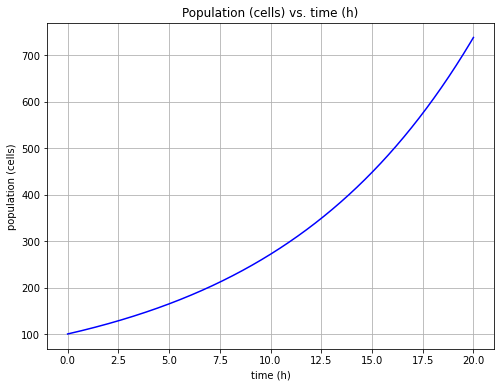

In [6]:

## define constants
r = 0.1
dt = 0.005

# define variables and their initial values
P = 100
t = 0

# create empty lists for storing data
xmodel = []
ymodel = []

# append initial values of t and P to our lists
xmodel.append(t)
ymodel.append(P)

# loop
while t<20:
    rate = r*P
    P = P + rate*dt
    t = t + dt
    
    xmodel.append(t)
    ymodel.append(P)

fig = plt.figure(figsize=(8,6))
plt.title('Population (cells) vs. time (h)')
plt.xlabel('time (h)')
plt.ylabel('population (cells)')
plt.plot(xmodel,ymodel,'b-')
plt.grid()
plt.show()

### Exercise: Experimenting with $r$

Try the following growth rate parameter values with $M=2000$:

- $r=0.02$
- $r=0.05$
- $r=0.1$
- $r=0.2$
- $r=0.5$

How does the value of $r$ affect the population curve?

### Exercise: Experimenting with $M$

Try the following carrying capacities with $r=0.1$:

- $M=1000$
- $M=2000$
- $M=5000$
- $M=10000$

How does the value of $M$ affect the population curve?

## Using a dynamic model to find fit parameters for a dataset

If we plot data along with our model, we can adjust the model parameters until our model fits the data. This is different than curve fitting because this approach will work *even if there is no mathematical function that fits the data.*

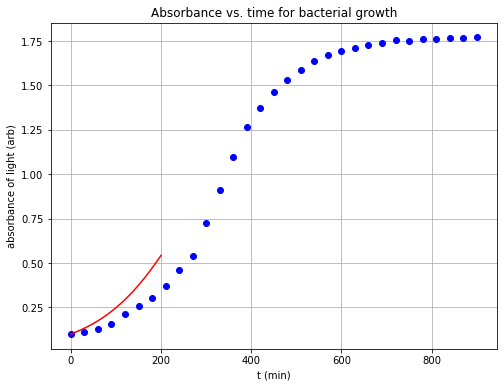

In [100]:
# define data
# t (min)	absorbance (arb)
data = StringIO("""x	y
0	0.101
30	0.109
60	0.13
90	0.157
120	0.211
150	0.26
180	0.303
210	0.373
240	0.46
270	0.541
300	0.723
330	0.913
360	1.099
390	1.263
420	1.371
450	1.463
480	1.531
510	1.587
540	1.635
570	1.673
600	1.691
630	1.713
660	1.729
690	1.74
720	1.753
750	1.751
780	1.761
810	1.764
840	1.769
870	1.768
900	1.77
""") 

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")

# define arrays for the data
xdata = df['x']
ydata = df['y']

## define constants
r = 0.01
dt = 0.005

# define variables and their initial values
P = 0.1
t = 0

# create empty lists for storing data
xmodel = []
ymodel = []

# append initial values of t and P to our lists
xmodel.append(t)
ymodel.append(P)

# loop
while t<200:
    rate = r*P- r*(P/M)*P
    P = P + rate*dt
    t = t + dt
    
    xmodel.append(t)
    ymodel.append(P)


# plot data and the best-fit function on the same graph
fig = plt.figure(figsize=(8,6))
plt.title("Absorbance vs. time for bacterial growth")
plt.xlabel('t (min)')
plt.ylabel('absorbance of light (arb)')
plt.grid(which='both', axis='both')
plt.plot(xdata, ydata, 'bo')
plt.plot(xmodel, ymodel, 'r-')
plt.show()

# Homework


## Exercise 1

Using an initial population of 20 and a growth rate of 50% (i.e. 0.5), model unconstrained growth for 15 years. Use a time step of one day and plot $P(t)$.

## Exercise 2

If the environment described in Exercise 1 has a carrying capacity of 1000, model the same population growth for the same period of time. Compare your graph of $P(t)$ to Figure 2.3.1 in *Introduction to Computational Science.*

## Exercise 3

Suppose the initial population in the previous exercise is 1500. Plot $P(t)$. Compare your graph of $P(t)$ to Figure 2.3.2 in *Introduction to Computational Science.*

## Exercise 4

Do Project 5 from *Introduction to Computational Science* (on page 42) on trout population.

## Exercise 5

Do Project 6 on the antarctic fin whale population.